# Proyecto Final (Logística para la Fórmula 1)

**Materia:** Matemáticas Discretas  
**Alumno:** Axel Daniel Malváez Flores  
5to Semestre de la Licenciatura en Ciencia de Datos

## Descripción del proyecto  

Se trazará un plan de viaje para la siguiente temporada de la Fórmula 1. Recorreremos varias ciudades en distintos países y determinaremos cual es la mejor fórma de tener 23 carreras, preferiblemente en países distintos de forma que el recorrido (distancia entre circuitos) sea mínima. Añadiremos ciertas métricas que también descartarán circuitos tales como circuitos que ya no tienen contrato o aquellos Grand Prixes que generen un derrame económico alto.

## Data Set

El data set fue obtenido de *Kaggle* en el siguiente link : https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020

### Resources
* https://geopandas.org/en/stable/gallery/polygon_plotting_with_folium.html
* https://geopandas.org/en/stable/gallery/plotting_with_folium.html
* https://python.plainenglish.io/using-folium-to-map-latitude-and-longitude-491f8dcc81ad
* https://geopandas.org/en/stable/docs/user_guide/mapping.html
* https://geopandas.org/en/stable/gallery/create_geopandas_from_pandas.html
* https://networkx.org/documentation/stable/auto_examples/drawing/plot_weighted_graph.html
* https://networkx.org/documentation/stable/auto_examples/drawing/plot_node_colormap.html
* https://stackoverflow.com/questions/63722124/get-distance-between-two-points-in-geopandas
* https://fontawesome.com/icons?d=gallery
* https://networkx.org/documentation/stable/reference/algorithms/approximation.html#module-networkx.algorithms.approximation.traveling_salesman

## Exploración del Data Set

In [1]:
# Librerías importantes que utilizaremos en el proyecto
import numpy as np 
import pandas as pd 
import geopandas as gpd 
import matplotlib.pyplot as plt 
import networkx as nx
import seaborn as sns 
import folium
#sns.set()
plt.rcParams["figure.figsize"] = (20,20)

In [2]:
circuits = pd.read_csv('Formula1/circuits.csv').drop(['url'], axis=1)
circuits = gpd.GeoDataFrame(circuits, geometry=gpd.points_from_xy(circuits.lng, circuits.lat))
circuits.head()

circuitId   circuitRef                            name      location  \
0          1  albert_park  Albert Park Grand Prix Circuit     Melbourne   
1          2       sepang    Sepang International Circuit  Kuala Lumpur   
2          3      bahrain   Bahrain International Circuit        Sakhir   
3          4    catalunya  Circuit de Barcelona-Catalunya      Montmeló   
4          5     istanbul                   Istanbul Park      Istanbul   

     country       lat        lng  alt                     geometry  
0  Australia -37.84970  144.96800   10  POINT (144.96800 -37.84970)  
1   Malaysia   2.76083  101.73800   18    POINT (101.73800 2.76083)  
2    Bahrain  26.03250   50.51060    7    POINT (50.51060 26.03250)  
3      Spain  41.57000    2.26111  109     POINT (2.26111 41.57000)  
4     Turkey  40.95170   29.40500  130    POINT (29.40500 40.95170)

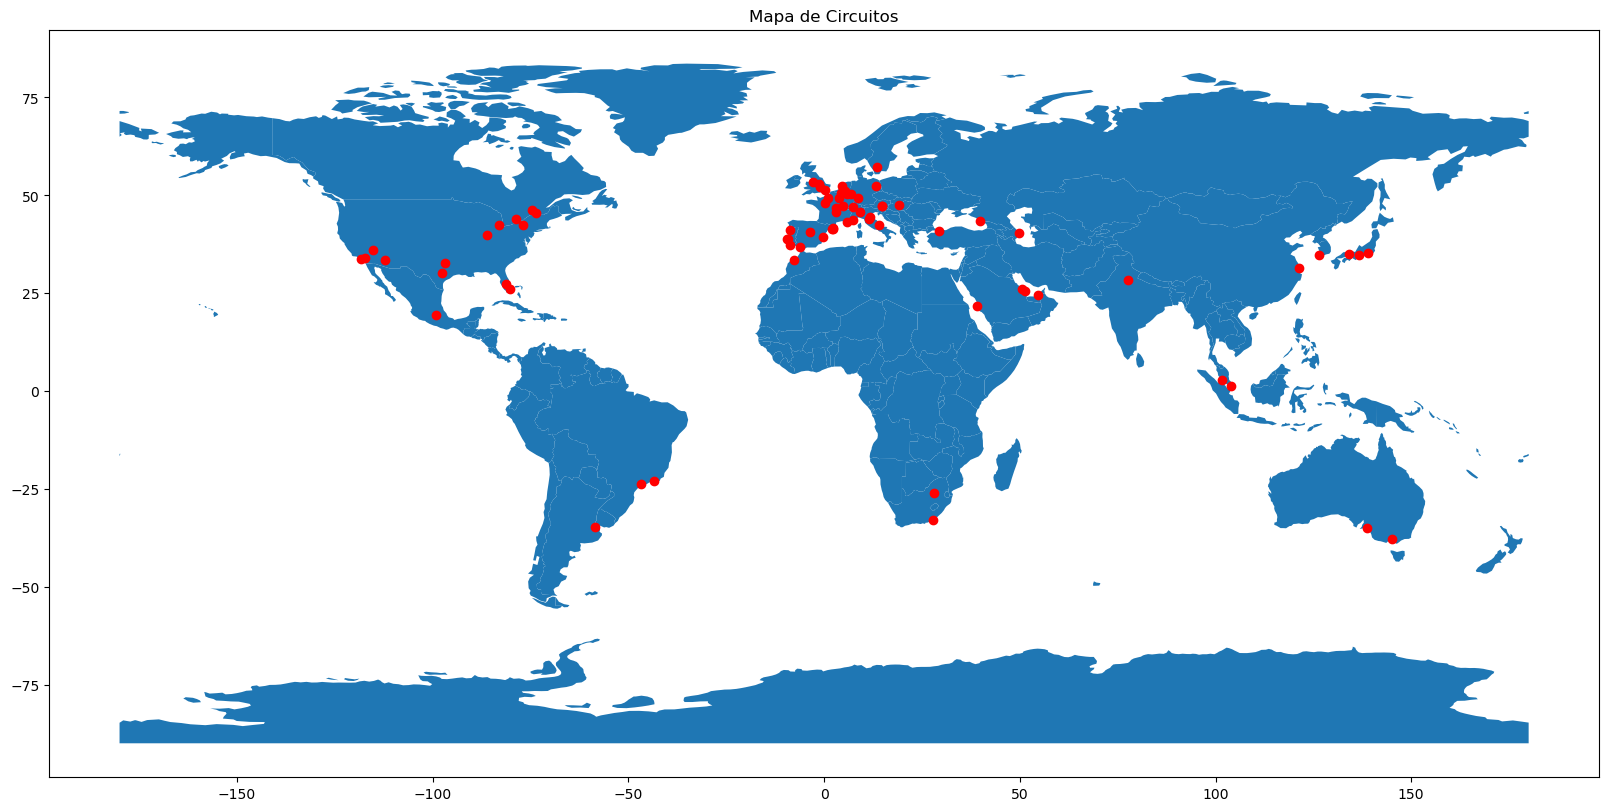

In [3]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

ax = world.plot()
circuits.plot(ax=ax, color='red')
plt.title('Mapa de Circuitos')
plt.show()

In [4]:
m = folium.Map()
for _, r in circuits.iterrows():
    lat = r['geometry'].y
    lon = r['geometry'].x
    folium.Marker(icon=folium.Icon(color='blue', icon='flag-checkered', prefix='fa'),location=[lat, lon],
                  popup='Circuit Name: {} <br> Country: {}'.format(r['name'], r['country'])).add_to(m)

m

Distancias entre dos autódromos (cambiamos la métrica para que el cálculo de la misma nos la regrese en metros)

In [5]:
# Cambio de crs
circuits = circuits.set_crs('epsg:4326')
circuits = circuits.to_crs(epsg=32631)

In [6]:
# Obtenemos dos circuitos uno de Australia y otro de España
circuit_1 = circuits.loc[0]
circuit_2 = circuits.loc[3]

In [7]:
print(f'The distance between the {circuit_1[2]} in {circuit_1[4]} and {circuit_2[2]} in {circuit_2[4]} is {circuit_1[8].distance(circuit_2[8])}')

The distance between the Albert Park Grand Prix Circuit in Australia and Circuit de Barcelona-Catalunya in Spain is 19956335.372858867


Creamos un diccionario que asigne un número a cada circuito

In [8]:
dict_circuits = {i:circuits['name'][i] for i in range(len(circuits))}

In [9]:
inverse_dict_circuits = {circuits['name'][i]:i for i in range(len(circuits))}

Calculando las distancias entre cada punto entre todos los puntos.

In [10]:
from itertools import combinations

num_circuits = [i for i in range(76)]
comb = list(combinations(num_circuits, 2))

In [11]:
G = nx.Graph()

for i in comb:
    x,y = i
    x_node = circuits[circuits['name'] == dict_circuits[x]].values[0][8]
    y_node = circuits[circuits['name'] == dict_circuits[y]].values[0][8]
    dist = x_node.distance(y_node)
    G.add_edge(x,y, weight=dist)

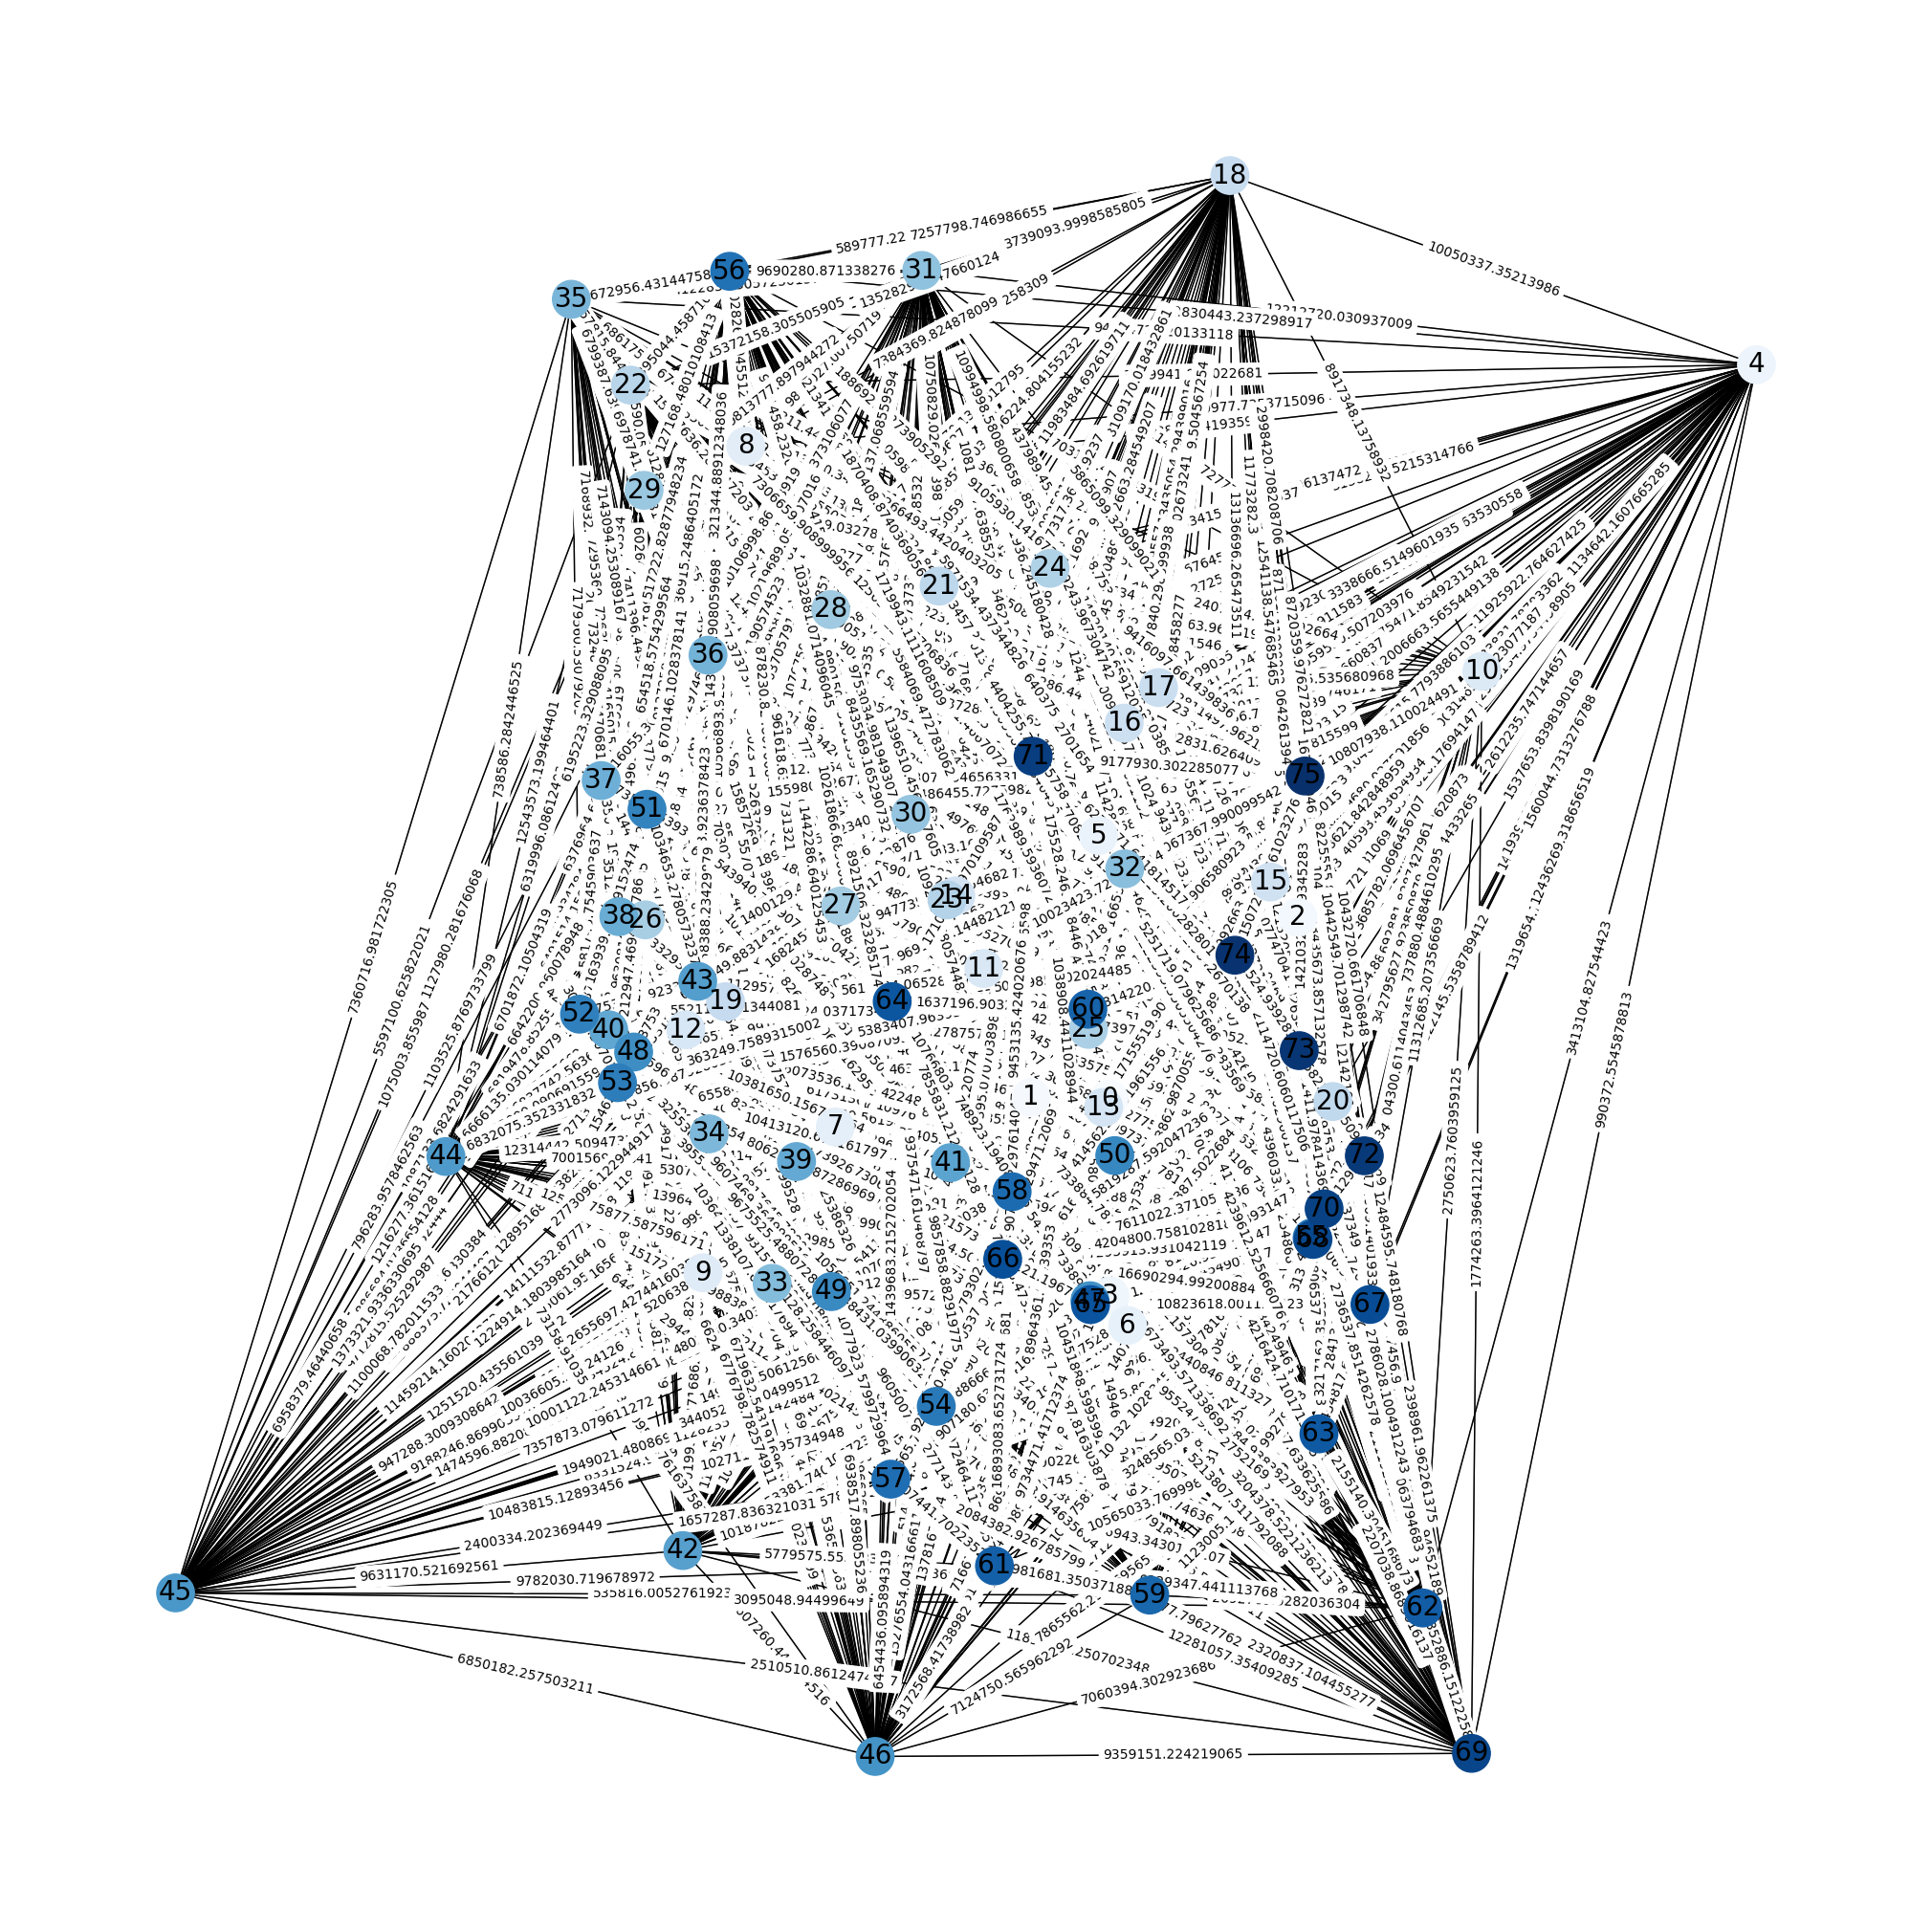

In [12]:
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, node_color=range(76), node_size=800, cmap=plt.cm.Blues)
#nx.draw_networkx_edges(G, pos, width=6)
nx.draw_networkx_edges(
    G, pos, width=1, alpha=0.5, edge_color="black", style="solid"
)
# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")

# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

plt.show()

## Algoritmos en gráficas

### DFS

El siguiente es el árbol resultante del recorrido **DFS** de nuestra gráfica de Circuitos

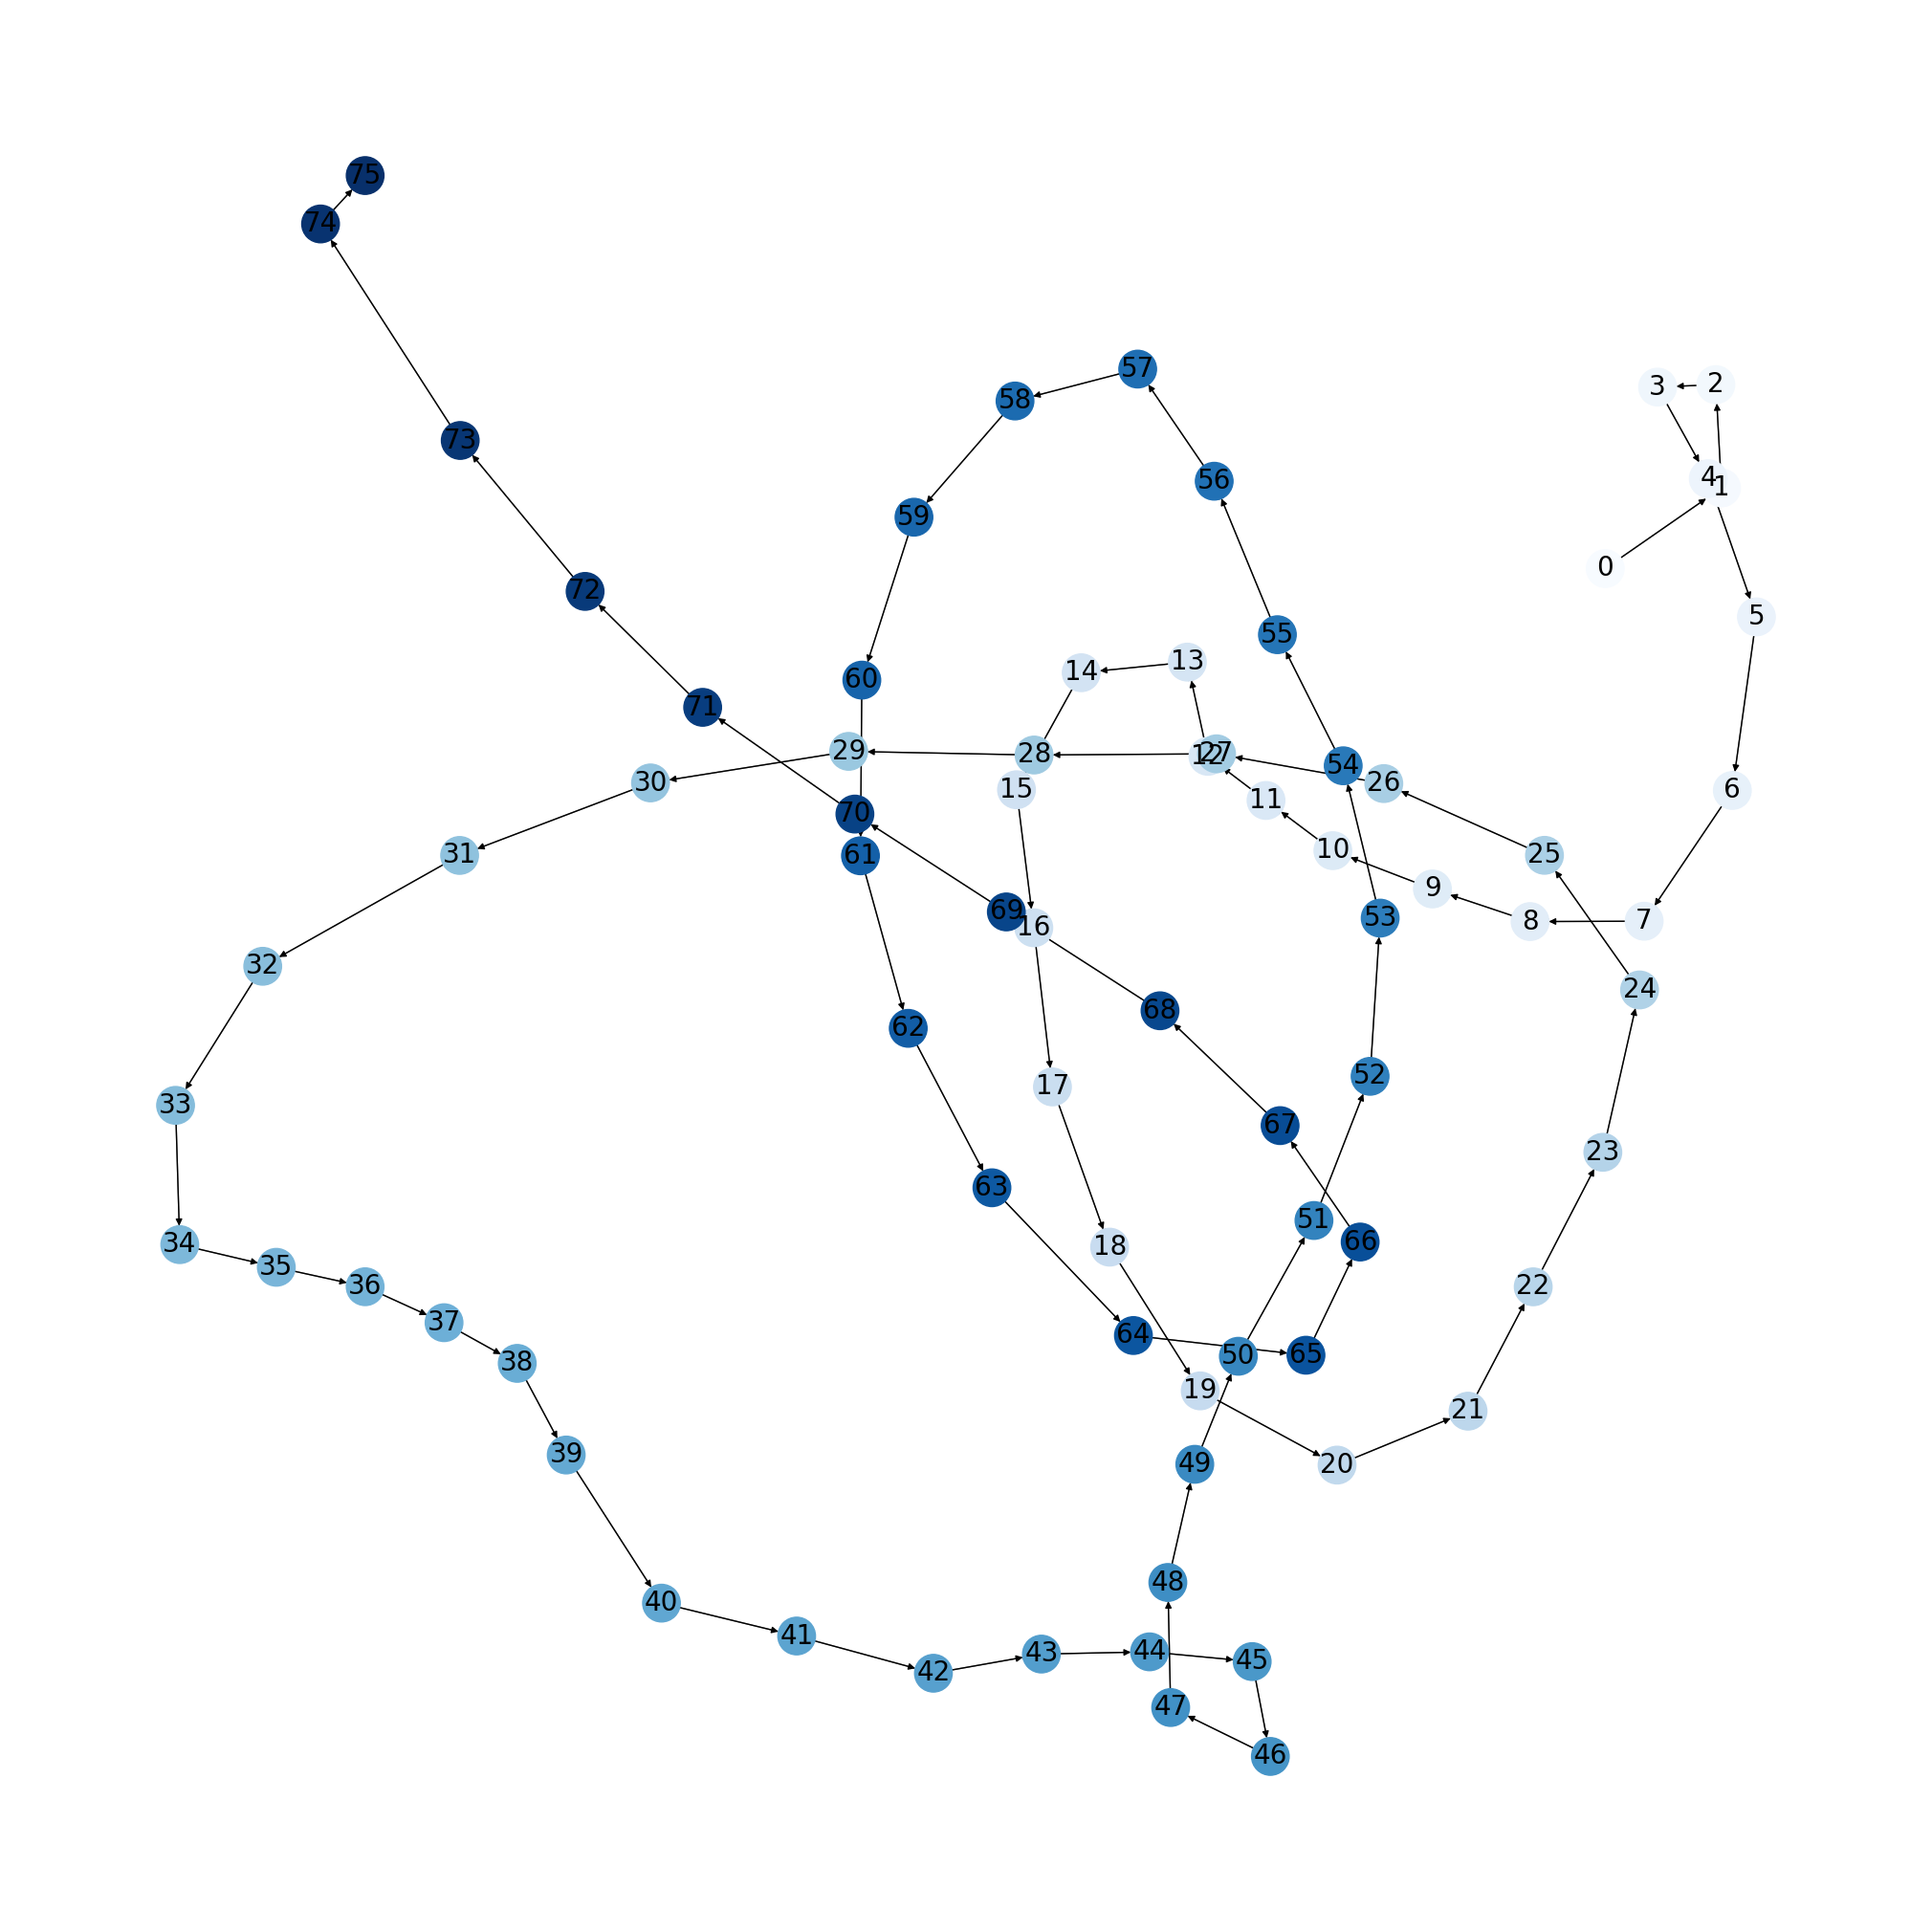

In [13]:
dfs_graph = nx.dfs_tree(G, 0)
pos = nx.spring_layout(dfs_graph, seed=76)
nx.draw(dfs_graph, pos, node_color=range(76), node_size=800, cmap=plt.cm.Blues)
nx.draw_networkx_edges(
    dfs_graph, pos, width=1, alpha=0.5, edge_color="black", style="solid"
)
# node labels
nx.draw_networkx_labels(dfs_graph, pos, font_size=20, font_family="sans-serif")

# edge weight labels
edge_labels = nx.get_edge_attributes(dfs_graph, "weight")
nx.draw_networkx_edge_labels(dfs_graph, pos, edge_labels)

plt.show()

### BFS

El siguiente es el recorrido **BFS** de nuestra gráfica

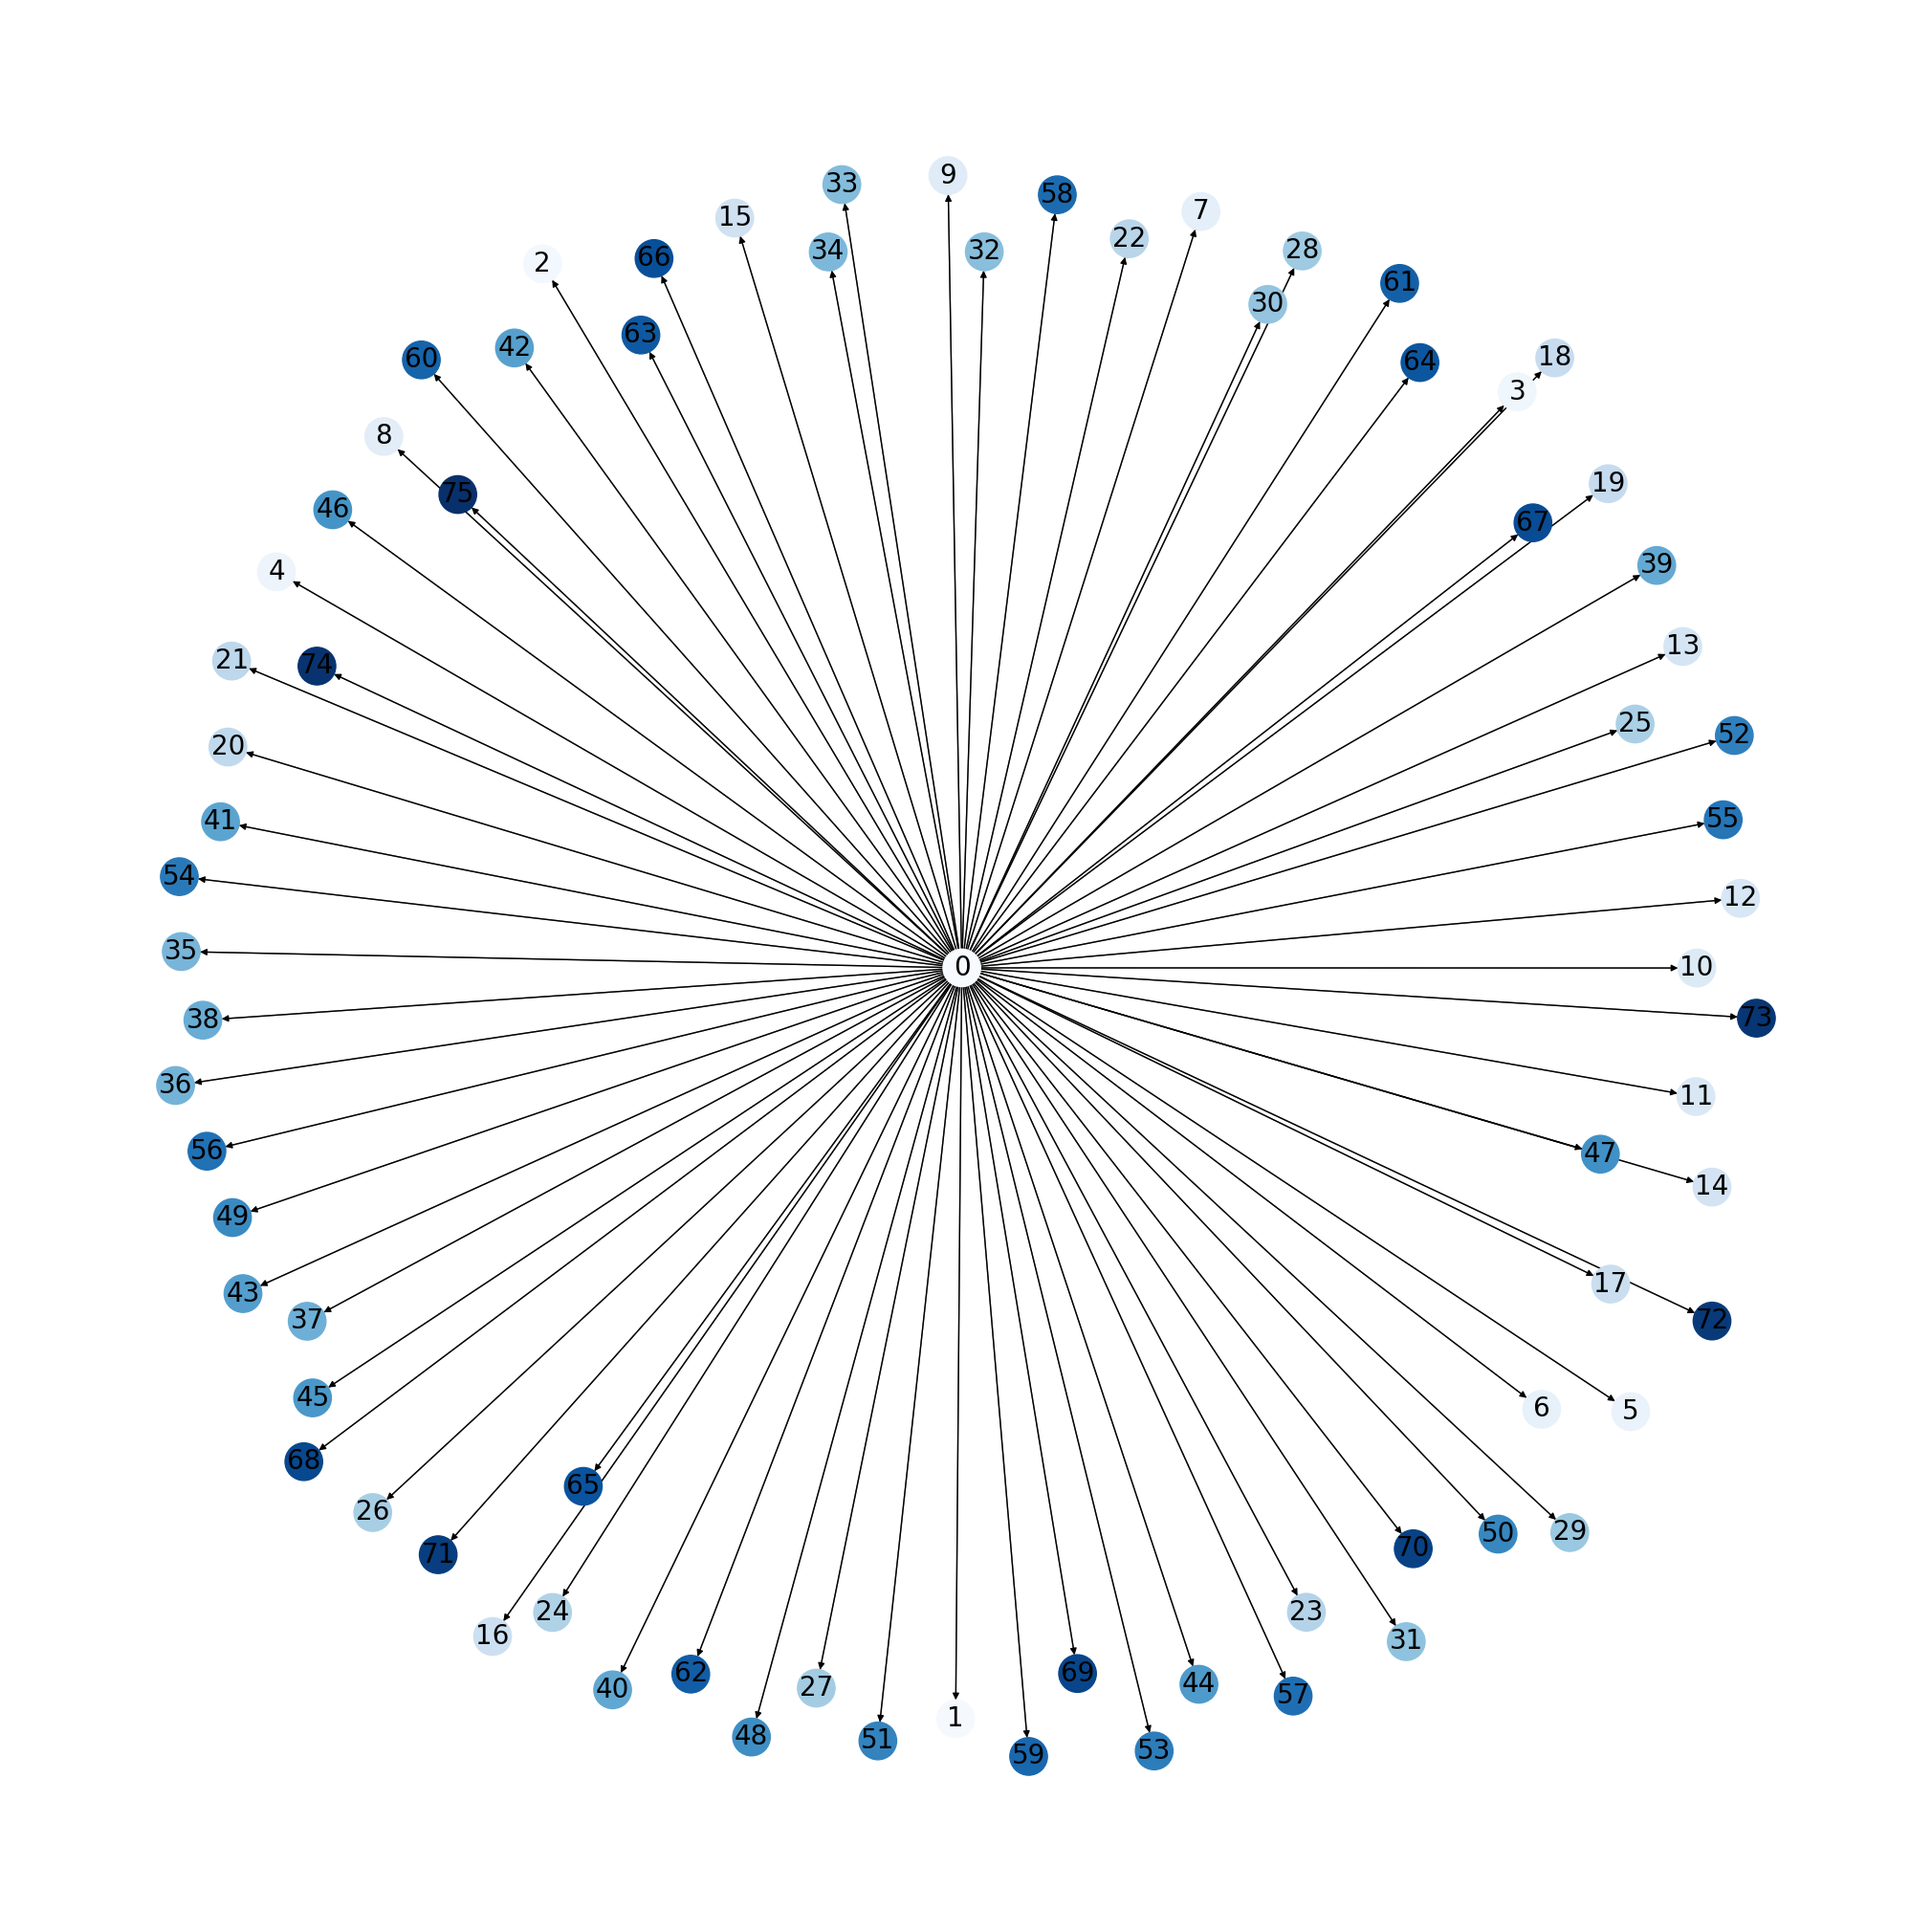

In [14]:
bfs_graph = nx.bfs_tree(G, 0)
pos = nx.spring_layout(bfs_graph, seed=76)
nx.draw(bfs_graph, pos, node_color=range(76), node_size=800, cmap=plt.cm.Blues)
nx.draw_networkx_edges(
    bfs_graph, pos, width=1, alpha=0.5, edge_color="black", style="solid"
)
# node labels
nx.draw_networkx_labels(bfs_graph, pos, font_size=20, font_family="sans-serif")

# edge weight labels
edge_labels = nx.get_edge_attributes(bfs_graph, "weight")
nx.draw_networkx_edge_labels(bfs_graph, pos, edge_labels)

plt.show()

### Algoritmo de Prim

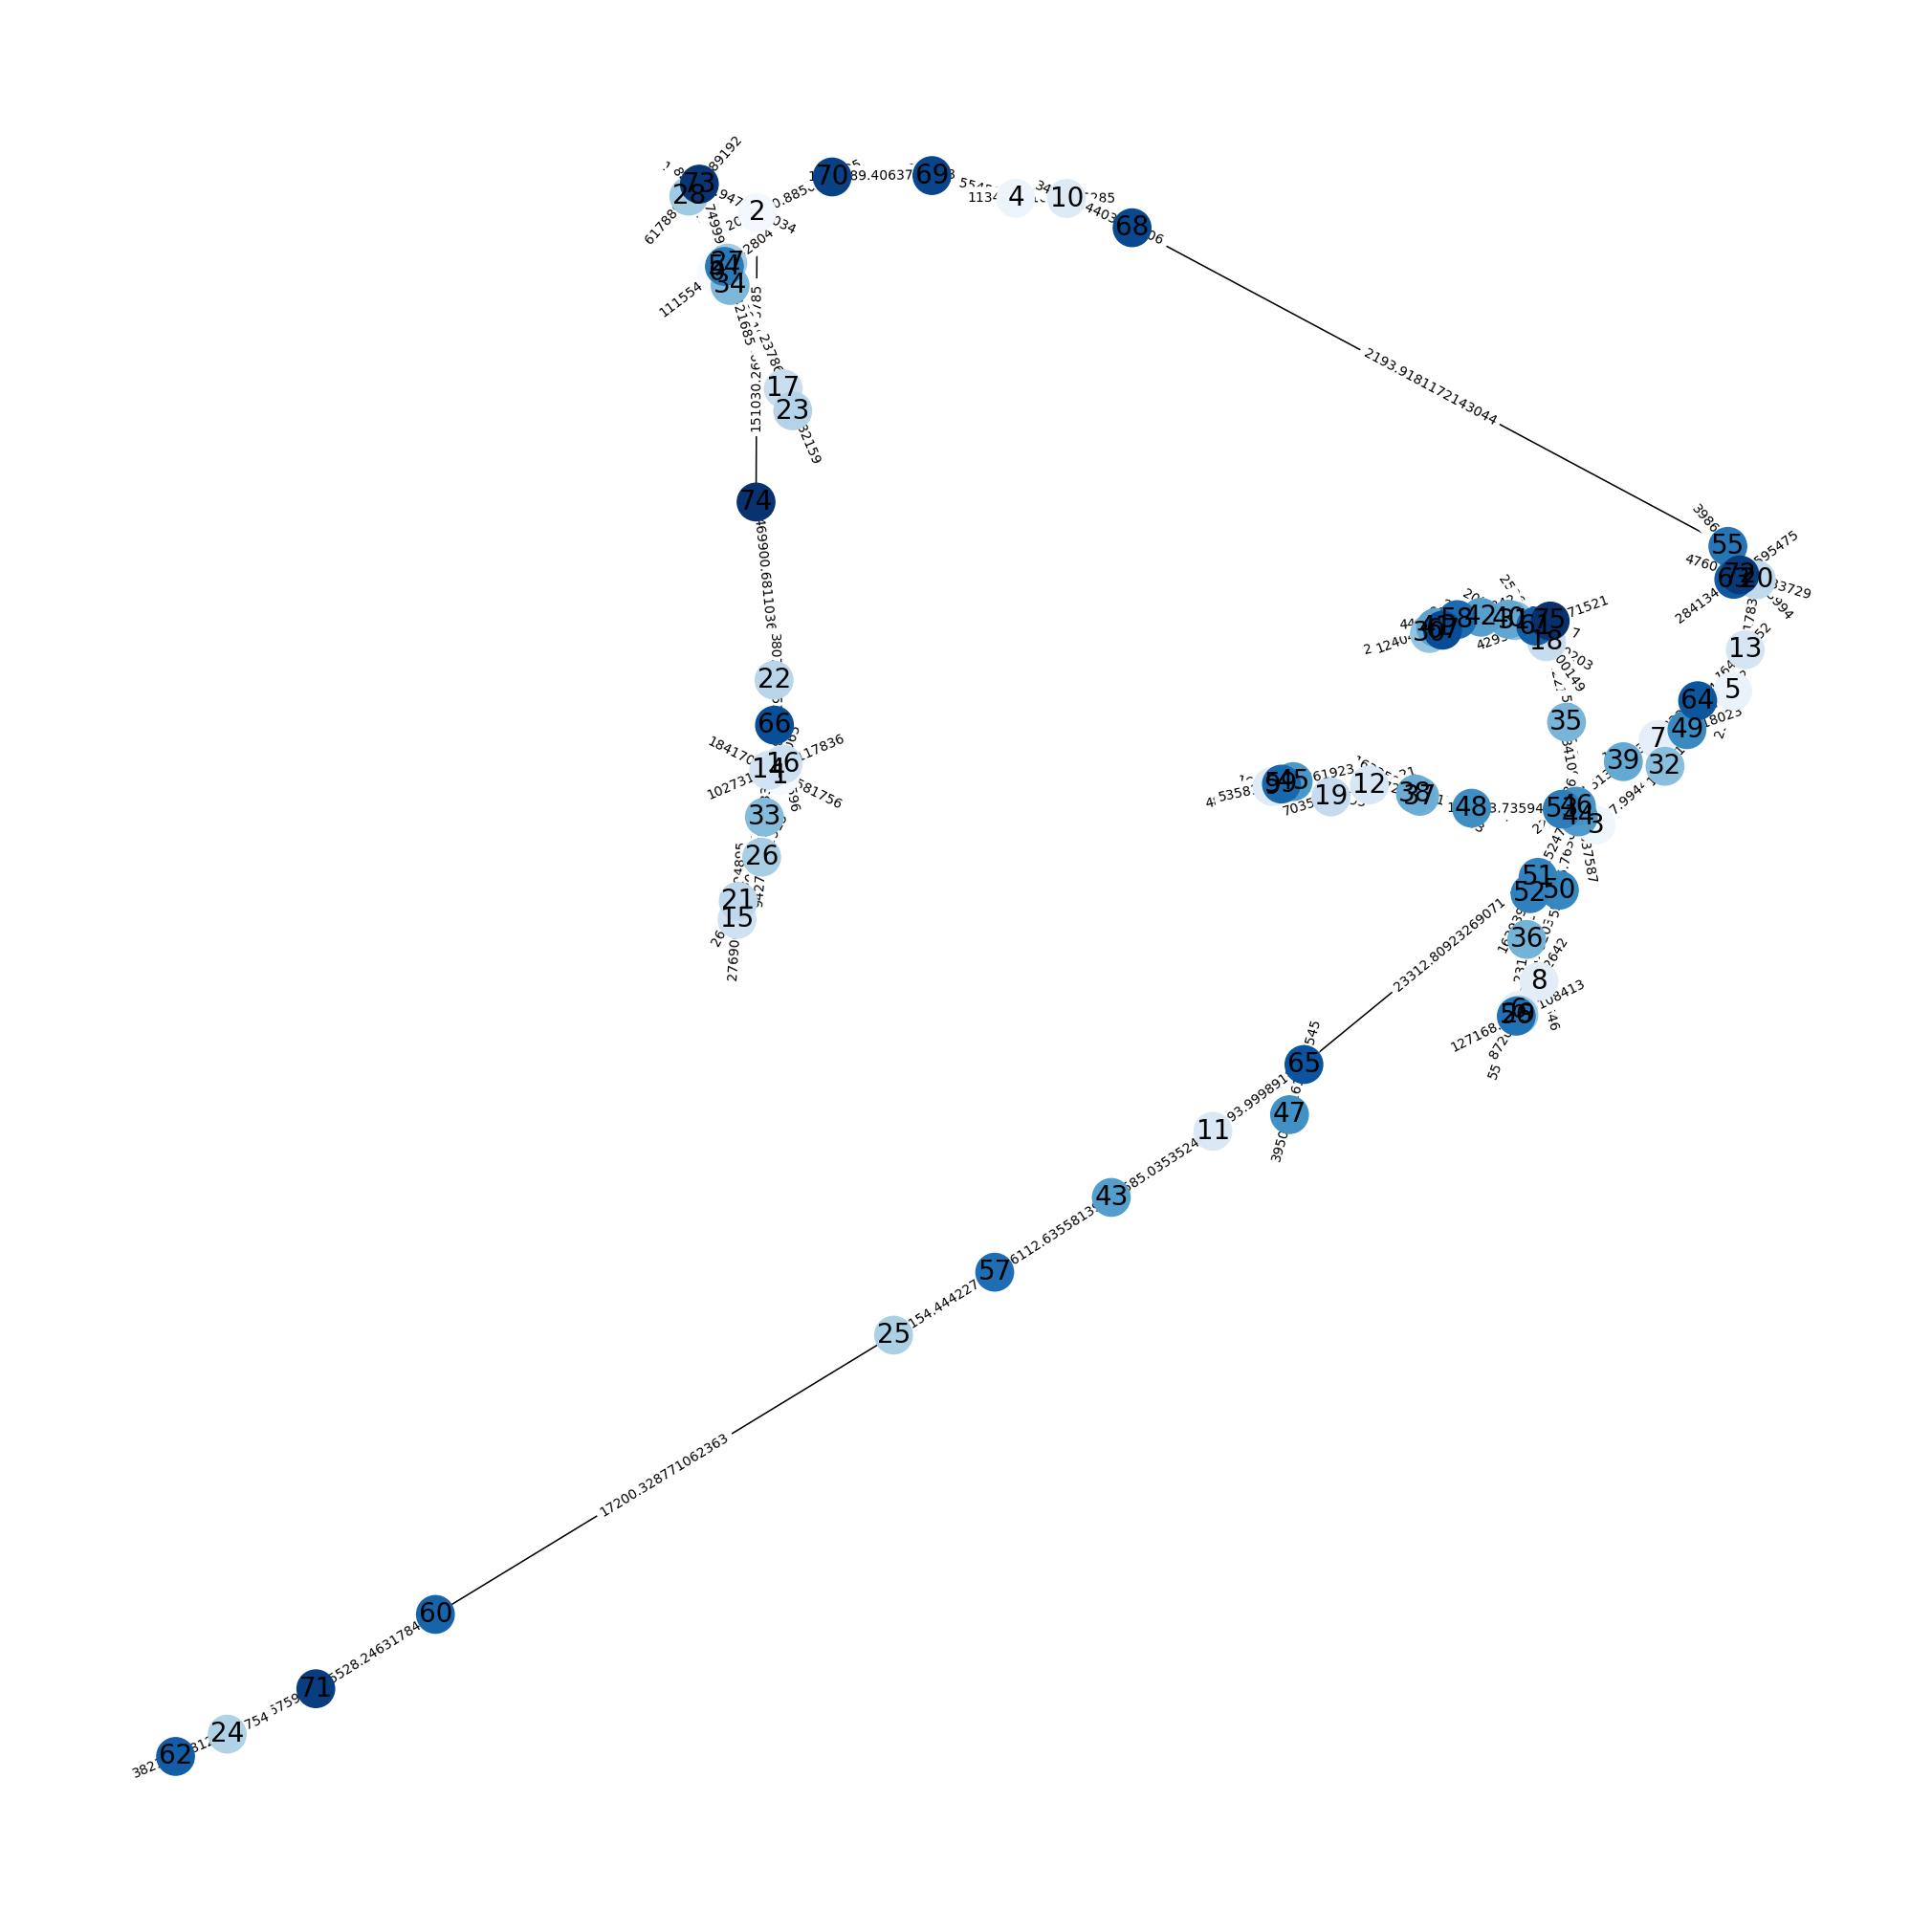

In [15]:
minimum_prim_tree = nx.minimum_spanning_tree(G, algorithm='prim', weight='weight')
pos = nx.spring_layout(minimum_prim_tree, seed=76)
nx.draw(minimum_prim_tree, pos, node_color=range(76), node_size=800, cmap=plt.cm.Blues)
nx.draw_networkx_edges(
    minimum_prim_tree, pos, width=1, alpha=0.5, edge_color="black", style="solid"
)
# node labels
nx.draw_networkx_labels(minimum_prim_tree, pos, font_size=20, font_family="sans-serif")

# edge weight labels
edge_labels = nx.get_edge_attributes(minimum_prim_tree, "weight")
nx.draw_networkx_edge_labels(minimum_prim_tree, pos, edge_labels)

plt.show()

### Algoritmo Kruskal

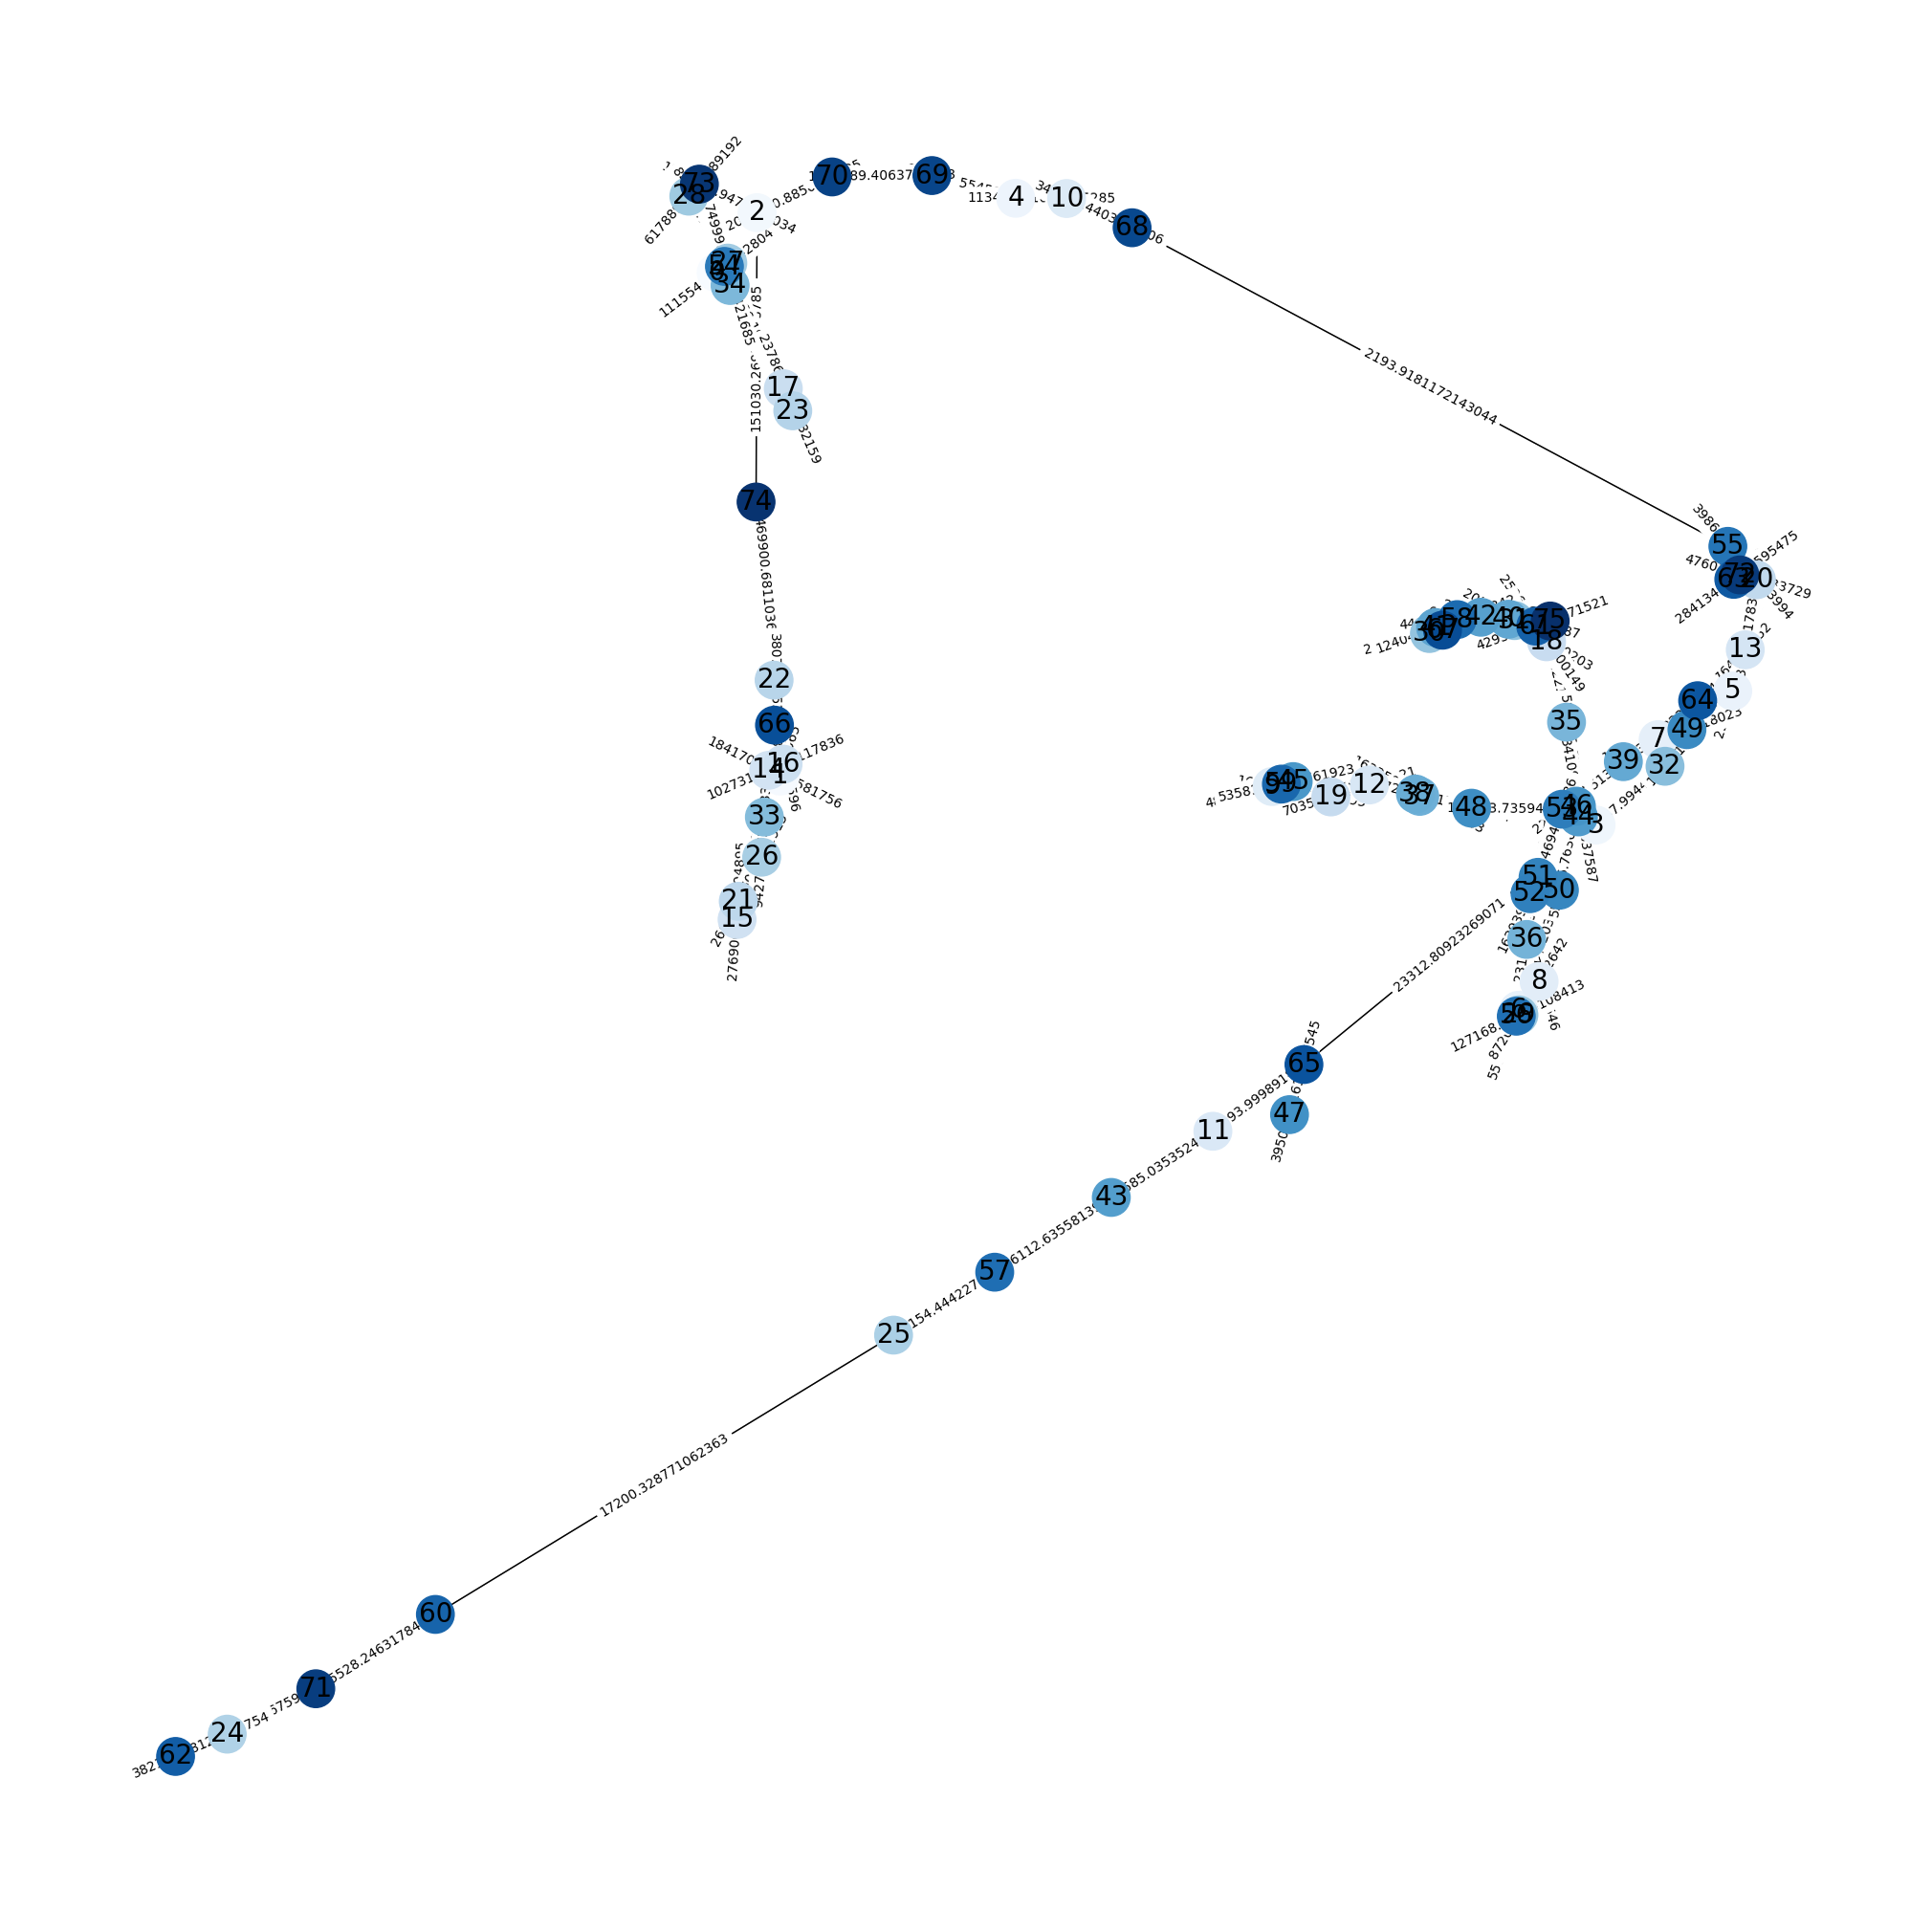

In [16]:
minimum_prim_tree = nx.minimum_spanning_tree(G, algorithm='kruskal', weight='weight')
pos = nx.spring_layout(minimum_prim_tree, seed=76)
nx.draw(minimum_prim_tree, pos, node_color=range(76), node_size=800, cmap=plt.cm.Blues)
nx.draw_networkx_edges(
    minimum_prim_tree, pos, width=1, alpha=0.5, edge_color="black", style="solid"
)
# node labels
nx.draw_networkx_labels(minimum_prim_tree, pos, font_size=20, font_family="sans-serif")

# edge weight labels
edge_labels = nx.get_edge_attributes(minimum_prim_tree, "weight")
nx.draw_networkx_edge_labels(minimum_prim_tree, pos, edge_labels)

plt.show()

### Algoritmo Boruvka

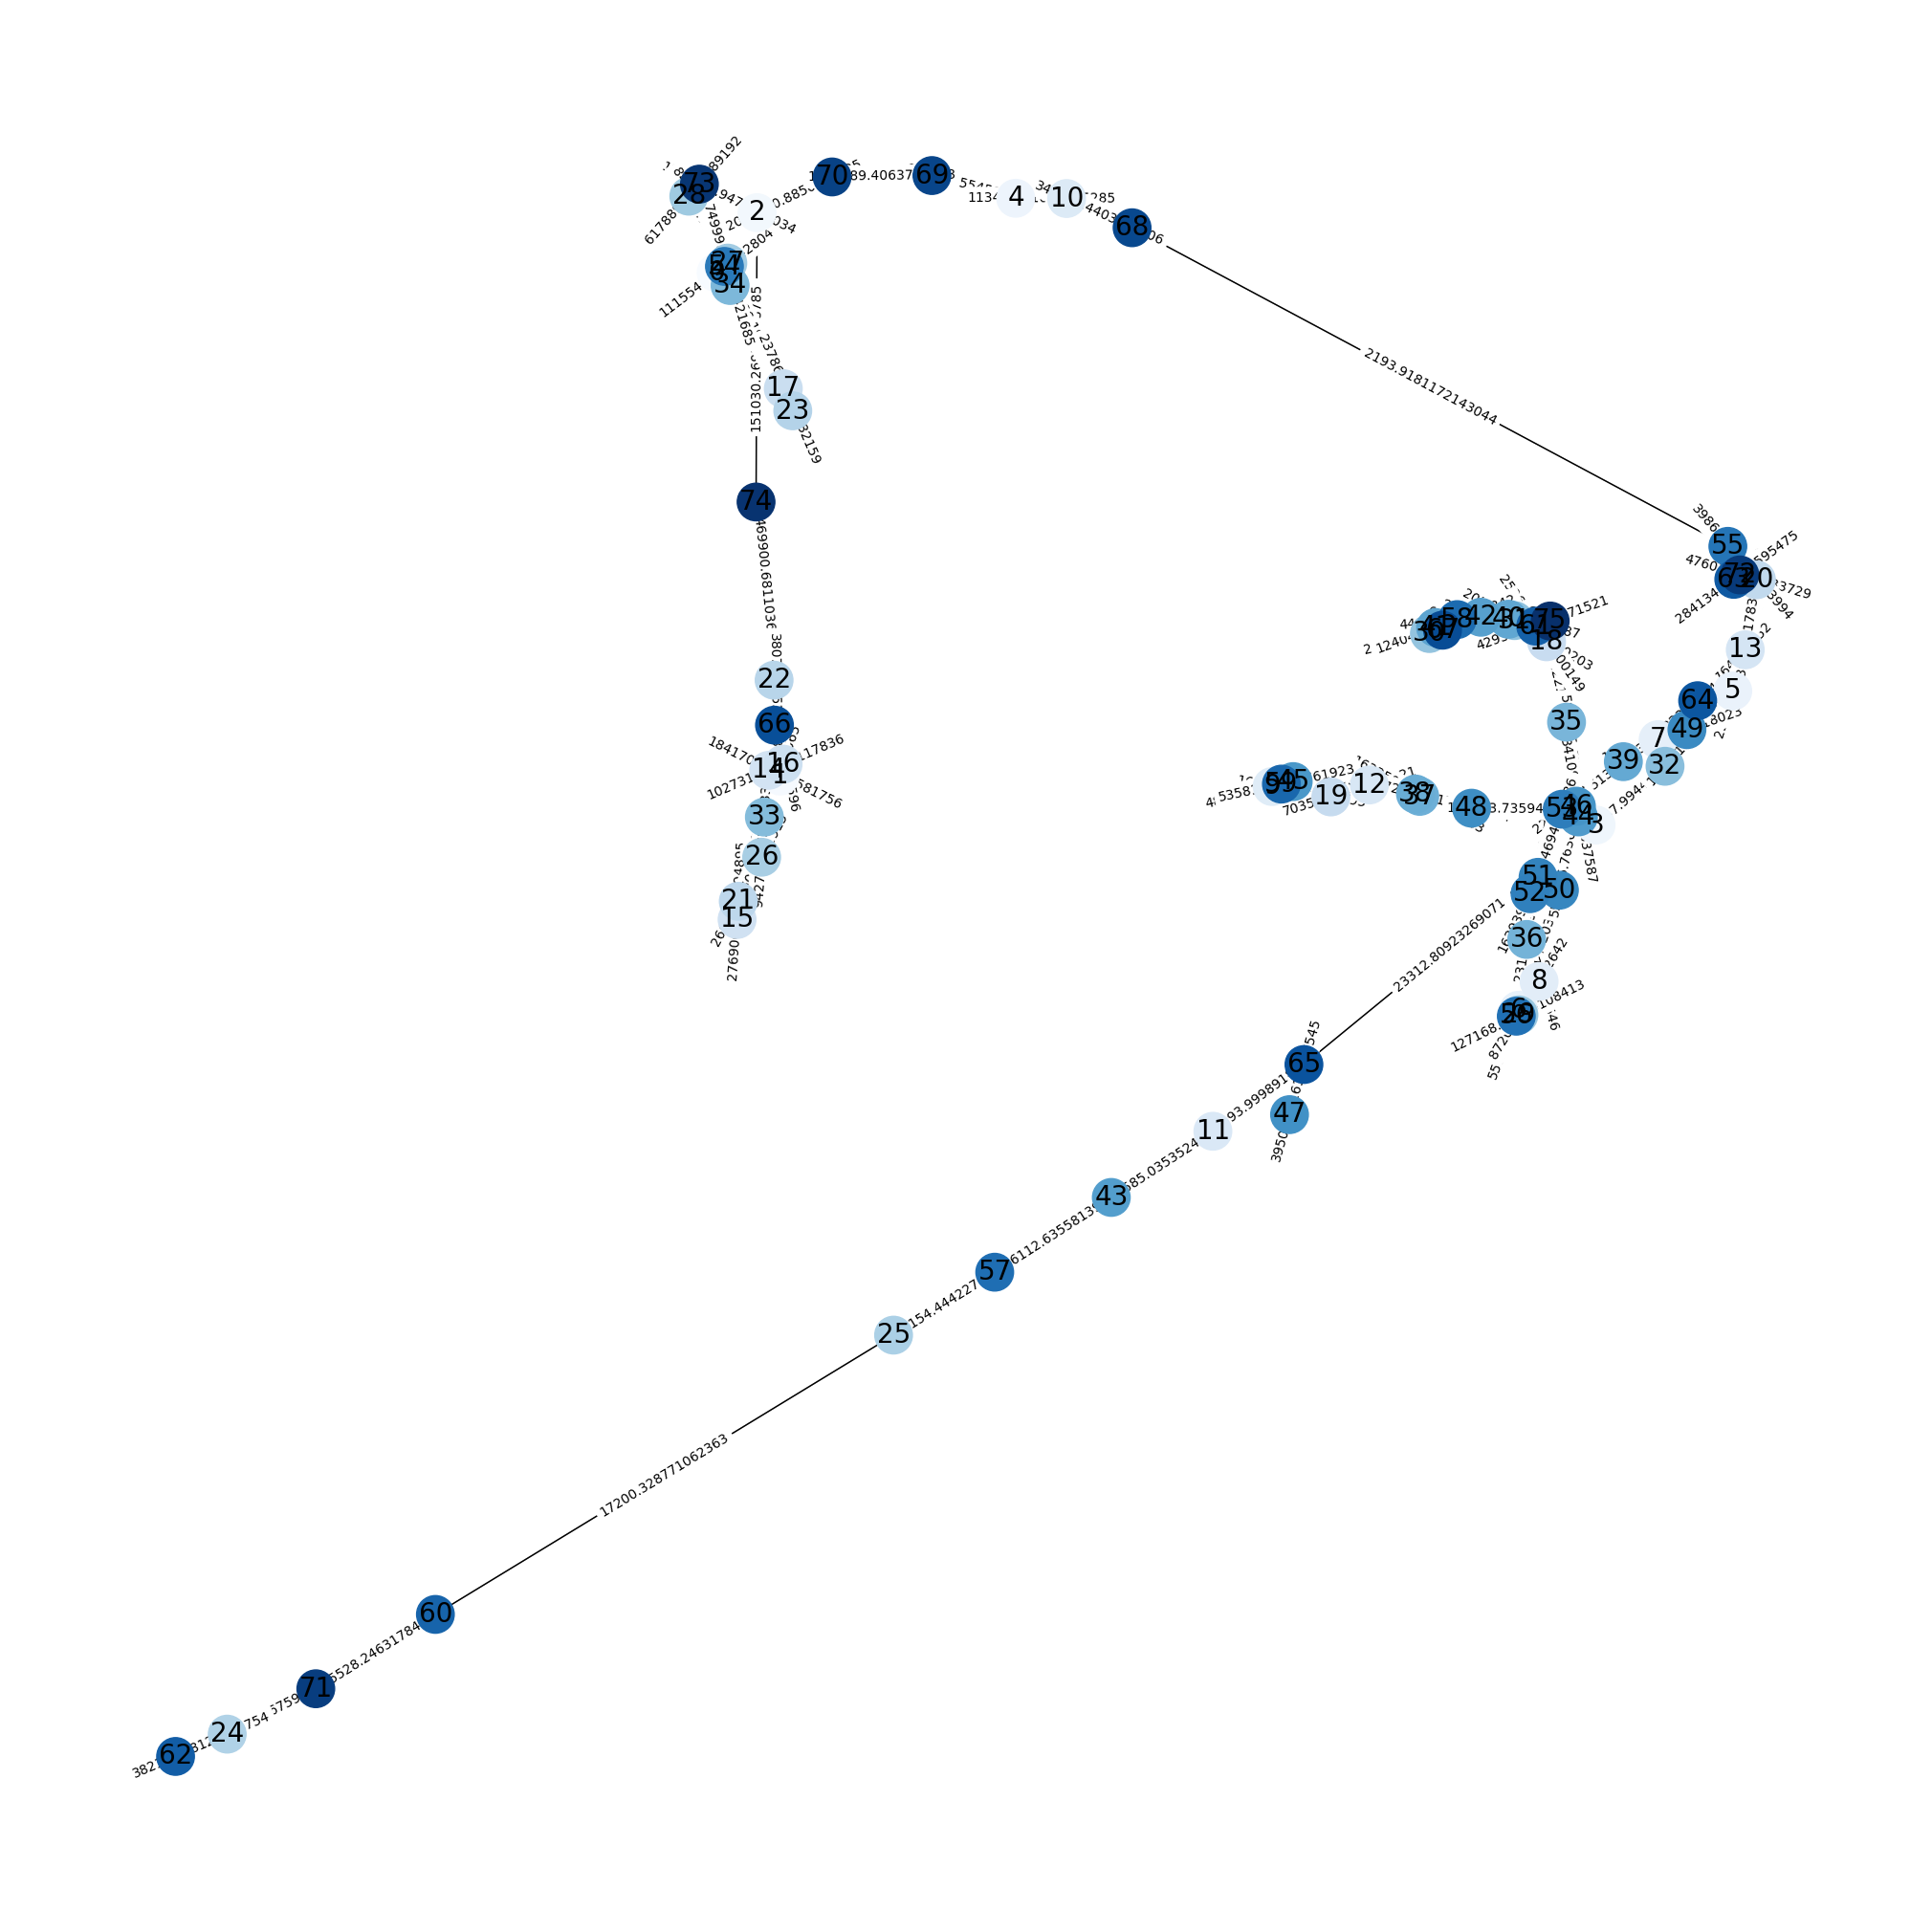

In [17]:
minimum_prim_tree = nx.minimum_spanning_tree(G, algorithm='boruvka', weight='weight')
pos = nx.spring_layout(minimum_prim_tree, seed=76)
nx.draw(minimum_prim_tree, pos, node_color=range(76), node_size=800, cmap=plt.cm.Blues)
nx.draw_networkx_edges(
    minimum_prim_tree, pos, width=1, alpha=0.5, edge_color="black", style="solid"
)
# node labels
nx.draw_networkx_labels(minimum_prim_tree, pos, font_size=20, font_family="sans-serif")

# edge weight labels
edge_labels = nx.get_edge_attributes(minimum_prim_tree, "weight")
nx.draw_networkx_edge_labels(minimum_prim_tree, pos, edge_labels)

plt.show()

### TSP

In [18]:
tsp = nx.approximation.traveling_salesman_problem(G, cycle=False)
tsp

[66,
 22,
 74,
 73,
 28,
 34,
 17,
 23,
 27,
 0,
 54,
 2,
 70,
 69,
 4,
 10,
 68,
 55,
 20,
 63,
 72,
 13,
 64,
 39,
 7,
 49,
 62,
 24,
 71,
 60,
 25,
 57,
 43,
 11,
 65,
 47,
 3,
 32,
 5,
 53,
 48,
 38,
 37,
 45,
 59,
 9,
 19,
 12,
 51,
 52,
 36,
 8,
 29,
 56,
 6,
 50,
 46,
 44,
 35,
 18,
 75,
 61,
 40,
 30,
 67,
 31,
 42,
 58,
 41,
 15,
 21,
 26,
 33,
 16,
 14,
 1]

In [19]:
tsp = nx.approximation.greedy_tsp(G, source=0)
tsp

[0,
 27,
 54,
 28,
 73,
 2,
 74,
 22,
 70,
 69,
 4,
 10,
 68,
 55,
 20,
 72,
 13,
 64,
 39,
 7,
 49,
 52,
 51,
 53,
 48,
 38,
 12,
 19,
 9,
 37,
 36,
 8,
 29,
 56,
 59,
 45,
 5,
 32,
 3,
 65,
 47,
 11,
 43,
 57,
 25,
 60,
 71,
 24,
 62,
 63,
 6,
 50,
 46,
 44,
 35,
 18,
 40,
 67,
 31,
 42,
 58,
 41,
 30,
 61,
 75,
 34,
 17,
 23,
 66,
 16,
 33,
 26,
 21,
 15,
 14,
 1,
 0]

### Djikstra

In [25]:
path = nx.dijkstra_path(G, 8, 70)
#print(f'La longitud es {length}')
print(f'El camino es el siguiente: \n{path}')

El camino es el siguiente: 
[8, 70]
